In [242]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [243]:
df = pd.read_excel('Data_Train - Flight (1).xlsx')

In [244]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [246]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [247]:
#dataset has few missing values so we can delete these rows
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [248]:
df.dropna(inplace=True)

In [249]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [250]:
### Data Preprocessing

In [251]:
#Preprocessing date_of_journey
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [252]:
#Need to convert date from object to datetime
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [253]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [254]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [255]:
df['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [256]:
df['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [257]:
df['journey_day']=df['Date_of_Journey'].dt.day

In [258]:
df['journey_month']=df['Date_of_Journey'].dt.month

In [259]:
df['journey_year']=df['Date_of_Journey'].dt.year

In [260]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-11 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-11 05:50:00,2023-04-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-11 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-04-11 18:05:00,2023-04-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-04-11 16:50:00,2023-04-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [261]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [262]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
journey_day                 int64
journey_month               int64
journey_year                int64
dtype: object

In [263]:
# Next extracting dept_time hour and min for the ML algorithm to learn
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_min'] = df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head()

In [264]:
extract_hour_min(df,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [265]:
extract_hour_min(df,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [266]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [267]:
## Performing Data Analysis
## 1. Checking which time of day most flights take off
def timeofday(x):
    if (x >= 0) & (x < 4):
        return 'Late Night'
    elif (x >= 4) & (x < 8):
        return 'Early Morning'
    elif (x >= 8) & (x < 12):
        return 'Morning'
    elif (x >= 12) & (x < 16):
        return 'Noon'
    elif (x >= 16) & (x < 20):
        return 'Evening'
    else:
        return 'Night'


In [268]:
df['timeofday'] = df['Dep_Time_hour'].apply(lambda x: timeofday(x))

In [269]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,Early Morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,Evening
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,Evening


<AxesSubplot:>

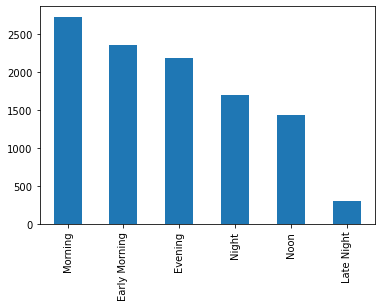

In [270]:
#Looks like most the flight take of at morning time slot
df['timeofday'].value_counts().plot(kind='bar')

In [271]:
#converting duration to h+m convention
def duration_preprocessing(x):
    if 'h' not in x:
        x='0h ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [272]:
df['Duration']=df['Duration'].apply(lambda x: duration_preprocessing(x))

In [273]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,Early Morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,Evening
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,Evening


In [274]:
#Taking all values from split array only the number not 'h' and 'm'
int(df['Duration'][0].split(' ')[0][0:-1])

2

In [275]:
int(df['Duration'][0].split(' ')[1][0:-1])

50

In [276]:
#hours
df['Duration_hour']=df['Duration'].apply(lambda x : x.split(' ')[0][0:-1])

In [277]:
#Mins
df['Duration_min']=df['Duration'].apply(lambda x : x.split(' ')[1][0:-1])

In [278]:
# Does duration have an impact on flight price or not
# So converting the duration to total minutes to check duration, eval function converts string equation to numerical
df['Duration_total_mins']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [279]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,Morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,Evening,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,Evening,4,45,285


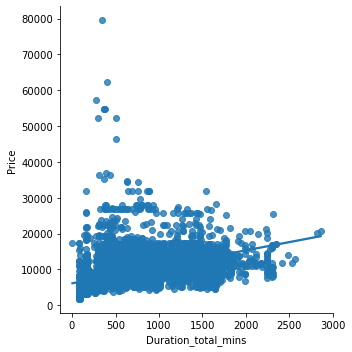

In [280]:
sns.lmplot(data=df,x='Duration_total_mins',y='Price')
# In most cases, as duration increases fare also increases

<AxesSubplot:ylabel='Destination'>

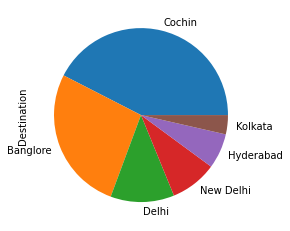

In [281]:
# Which city has max destinations
df['Destination'].value_counts().plot(kind='pie')

In [282]:
#On which route is jet airways most used
df[df['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

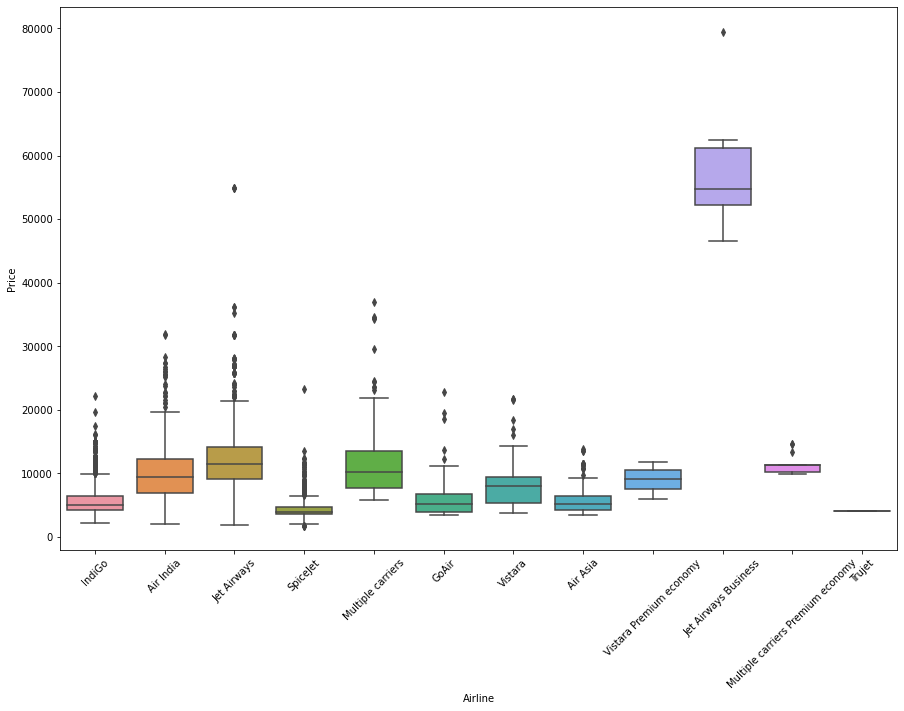

In [283]:
# Airline Vs Price Analysis
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Airline',y='Price')
plt.xticks(rotation=45)
plt.show()

In [284]:
# Applying One Hot Encoding
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,Morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,Evening,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,Evening,4,45,285


In [285]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [286]:
#Can drop the above column since most of them are no info
#Dropping route because stops indicates represents route
df.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [287]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,Night,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,Early Morning,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,Morning,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,Evening,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,Evening,4,45


In [288]:
categorical_columns=[col for col in df.columns if df[col].dtype=='object']

In [289]:
numerical_columns=[col for col in df.columns if df[col].dtype!='object']

In [290]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [291]:
# For ordinal/Hierarchial Data we use label encoding
# For nominal Data we use one hot encoding
onehotenco = pd.get_dummies(df['Source'],drop_first=True)
onehotenco

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [292]:
df1 = df.join(onehotenco)

In [293]:
df = df1

In [294]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,Night,2,50,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,Early Morning,7,25,0,0,1,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,Morning,19,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,Evening,5,25,0,0,1,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,Evening,4,45,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,19,55,22,25,Evening,2,30,0,0,1,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20,Night,2,35,0,0,1,0
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,7229,27,4,8,20,11,20,Morning,3,0,0,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,3,1,11,30,14,10,Morning,2,40,0,0,0,0


In [295]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [296]:
df['Destination'].replace('New Delhi','Delhi',inplace=True)

In [297]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [298]:
# Label encoding data here based on assumption destination is ordinal data
dest = df.groupby(['Destination'])['Price'].mean().sort_values().index
dict1={key:index for index,key in enumerate(dest,0)}

In [299]:
dict1

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [300]:
df['Destination'] = df['Destination'].map(dict1)
df['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [301]:
# Doing the same for airlines
airlines = df.groupby(['Airline'])['Price'].mean().sort_values().index

In [302]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [303]:
dict2= {key:index for index,key in enumerate(airlines,0)}
dict2

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [304]:
df['Airline']=df['Airline'].map(dict2)
df['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [305]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,Night,2,50,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,Early Morning,7,25,0,0,1,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,Morning,19,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,Evening,5,25,0,0,1,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,Evening,4,45,0,0,0,0


In [306]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [307]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [308]:
stops

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [309]:
df['Total_Stops'] = df["Total_Stops"].map(stops)

In [310]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,Night,2,50,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,Early Morning,7,25,0,0,1,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,Morning,19,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,Evening,5,25,0,0,1,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,Evening,4,45,0,0,0,0


In [311]:
# Removing Outliers
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

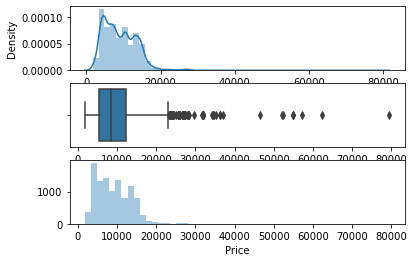

In [313]:
plot(df,'Price')

In [315]:
# Assuming from above distribution plots, above 35000 seems to be outliers, so replacing those with median price values
df['Price']=np.where(df['Price']>=35000,df['Price'].median(),df['Price'])

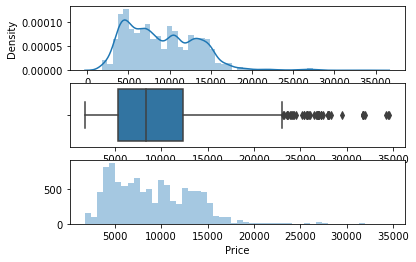

In [316]:
plot(df,'Price')

In [317]:
# Selecting the best features
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,timeofday,Duration_hour,Duration_min,Chennai,Delhi,Kolkata,Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,Night,2,50,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,Early Morning,7,25,0,0,1,0
2,10,Delhi,4,19h 0m,2,13882.0,6,9,9,25,4,25,Morning,19,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218.0,5,12,18,5,23,30,Evening,5,25,0,0,1,0
4,3,Banglore,2,4h 45m,1,13302.0,3,1,16,50,21,35,Evening,4,45,0,0,0,0


In [318]:
df.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [322]:
df.drop(columns=['timeofday'],axis=1,inplace=True)

In [323]:
df.head()

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Chennai,Delhi,Kolkata,Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,0,1,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,0,0,1,0
4,3,2,1,13302.0,3,1,16,50,21,35,4,45,0,0,0,0


In [326]:
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_min']=df['Duration_min'].astype(int)

In [327]:
df.dtypes
# Making sure all dtypes are numerical

Airline                int64
Destination            int64
Total_Stops            int64
Price                float64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hour          int32
Duration_min           int32
Chennai                uint8
Delhi                  uint8
Kolkata                uint8
Mumbai                 uint8
dtype: object

In [328]:
from sklearn.feature_selection import mutual_info_regression

In [331]:
X=df.drop('Price',axis=1)

In [332]:
X

,Airline,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Chennai,Delhi,Kolkata,Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,0,1,0
2,10,4,2,6,9,9,25,4,25,19,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,0,1,0
4,3,2,1,3,1,16,50,21,35,4,45,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4,9,19,55,22,25,2,30,0,0,1,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,0,1,0
10680,10,2,0,27,4,8,20,11,20,3,0,0,0,0,0
10681,5,2,0,3,1,11,30,14,10,2,40,0,0,0,0


In [333]:
y=df['Price']

In [334]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [335]:
mutual_info_regression(X,y)

array([0.97597547, 0.99687034, 0.77824571, 0.19931632, 0.24144647,
       0.33884746, 0.25817248, 0.3969255 , 0.34013507, 0.47146187,
       0.34091594, 0.13528194, 0.51489438, 0.44821453, 0.20032651])

In [338]:
imp = pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['Mutual Regression Info']

In [339]:
imp

,Mutual Regression Info
Airline,0.975896
Destination,1.001948
Total_Stops,0.784121
journey_day,0.192910
journey_month,0.239452
Dep_Time_hour,0.332241
Dep_Time_min,0.254991
Arrival_Time_hour,0.401798
Arrival_Time_min,0.357229
Duration_hour,0.468533


In [355]:
# Applying Machine Learning
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [356]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [357]:
model = rfr.fit(X_train,y_train)

In [358]:
y_pred = model.predict(X_test)

In [359]:
y_pred

array([16784.35,  6298.25,  8801.55, ...,  5768.74,  3126.25,  6954.42])

In [360]:
y_pred.shape

(3205,)

In [361]:
# Saving the model
import pickle

In [362]:
file = open('rf_random.pkl','wb') # opening in write binary mode

In [363]:
pickle.dump(model,file) # Dumps info of the model into the created file. Stores the coefficients

In [364]:
# Now opening the saved file
model = open('rf_random.pkl','rb') # Opening in read binary mode
forest = pickle.load(model)

In [365]:
forest.predict(X_test)

array([16784.35,  6298.25,  8801.55, ...,  5768.74,  3126.25,  6954.42])

In [366]:
# Checking Evaluation of Model
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100


In [367]:
mape(y_test,y_pred)

13.267120327537993

In [370]:
def predict(ml_model):
    
    model = ml_model.fit(X_train,y_train)
    print('Training_score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('Predictions are : {}'.format(y_pred))
    print('\n')
    
    from sklearn import metrics
    r2_score= metrics.r2_score(y_test,y_pred)
    print('R2_Score :{}'.format(r2_score))
    print('MSE :',metrics.mean_squared_error(y_test,y_pred))
    print('MAE :',metrics.mean_absolute_error(y_test,y_pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('MAPE :',np.round(mape(y_test,y_pred),2))
    sns.distplot(y_test-y_pred)
    


Training_score : 0.9530322673760687
Predictions are : [16741.72  6398.83  8841.82 ...  5846.45  3115.75  6978.54]


R2_Score :0.8113139972910314
MSE : 3669100.4379852414
MAE : 1184.4159728302639
RMSE : 1915.4896079032226
MAPE : 13.32


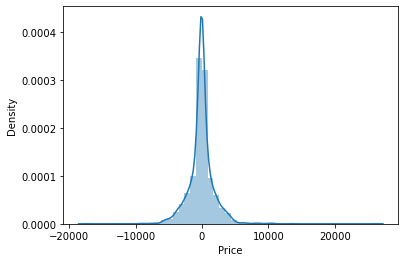

In [371]:
predict(RandomForestRegressor())

In [372]:
# Hypertuning the model
from sklearn.model_selection import RandomizedSearchCV

In [373]:
reg_rf = RandomForestRegressor()

In [388]:
n_estimators = [int(x) for x in np.linspace(1000,1200,6)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(5,30,4)]
min_samples_split = [5,10,15,25,100]

In [389]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features' :max_features,
    'max_depth' :max_depth,
    'min_samples_split' : min_samples_split
}

In [390]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 25, 100]}

In [391]:
rf_random = RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3)

In [392]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 25,
                                                              100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]})

In [393]:
rf_random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [394]:
pred2 = rf_random.predict(X_test)

In [395]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8322612159348552

In [396]:
# Able to achieve a slightly higher r2 score with hyperparameter tuning